In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import seaborn as sns 
from sklearn.manifold import TSNE

In [2]:
#veri setimiz virgül yada noktalı virgül ile ayrılmadığından boşluklarla ayrıldığından delim_whitespace kullandık bu metod sadece bir boşluk değil birden fazla boşluk olsada dataları ayırır
#on_bad_lines ile bazı verilere fazladan olmayan sütun değeri atanmış bunları çıkardık
data=pd.read_csv('marketing_campaign.csv',delim_whitespace=True,on_bad_lines='skip')
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1.0
1,2174,1954,Graduation,Single,46344,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0.0
2,4141,1965,Graduation,Together,71613,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0.0
3,6182,1984,Graduation,Together,26646,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0.0
4,5324,1981,PhD,Married,58293,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0.0


In [3]:
data.shape

(2040, 29)

In [4]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2040 entries, 0 to 2039
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2040 non-null   int64  
 1   Year_Birth           2040 non-null   int64  
 2   Education            2040 non-null   object 
 3   Marital_Status       2040 non-null   object 
 4   Income               2040 non-null   object 
 5   Kidhome              2040 non-null   int64  
 6   Teenhome             2040 non-null   object 
 7   Dt_Customer          2040 non-null   object 
 8   Recency              2040 non-null   int64  
 9   MntWines             2040 non-null   int64  
 10  MntFruits            2040 non-null   int64  
 11  MntMeatProducts      2040 non-null   int64  
 12  MntFishProducts      2040 non-null   int64  
 13  MntSweetProducts     2040 non-null   int64  
 14  MntGoldProds         2040 non-null   int64  
 15  NumDealsPurchases    2040 non-null   i

In [5]:
data.describe()

,ID,Year_Birth,Kidhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2040.000000,2040.000000,2040.000000,2040.000000,2040.000000,2040.000000,2040.000000,2040.000000,2040.000000,2040.000000,...,2040.000000,2040.000000,2040.000000,2040.000000,2040.000000,2040.000000,2040.000000,2040.000000,2040.000000,2019.000000
mean,5595.943627,1968.489706,0.440686,50.837255,312.000980,26.855392,169.277941,36.541667,26.518627,43.210294,...,5.250000,0.073529,0.076961,0.075490,0.062745,0.013725,0.039216,3.082353,10.887255,0.154037
std,3249.676614,11.790300,0.538295,41.680856,341.644224,43.187459,228.263721,53.806332,40.854683,51.560698,...,2.493788,0.261068,0.266595,0.264245,0.242563,0.116378,0.315422,0.807689,1.105976,0.361073
min,0.000000,1899.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000
25%,2834.750000,1959.000000,0.000000,24.000000,25.000000,1.000000,16.000000,2.000000,1.000000,8.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,11.000000,0.000000
50%,5492.000000,1970.000000,0.000000,50.000000,182.000000,8.000000,68.000000,12.000000,8.000000,23.500000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,11.000000,0.000000
75%,8439.750000,1977.000000,1.000000,74.000000,514.250000,33.000000,235.000000,49.000000,33.000000,55.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,11.000000,0.000000
max,11191.000000,1996.000000,2.000000,861.000000,1493.000000,490.000000,1725.000000,263.000000,362.000000,321.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,11.000000,11.000000,1.000000


In [6]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [7]:
data.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                  0
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response               21
dtype: int64

In [8]:
data = data.dropna(subset=['Response']) #boş sütunları sildik zaten 21 tane %1-%2 arasında
data.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [9]:
#numeric olmayan kolonlar
non_numeric_columns=data.select_dtypes(exclude=['number']).columns
print(non_numeric_columns)

Index(['Education', 'Marital_Status', 'Income', 'Teenhome', 'Dt_Customer'], dtype='object')


In [10]:
#uniqe değerleri belirledik bunları sayısal değerlere dönüştüreceğiz
for item in non_numeric_columns:
    print(data[item].unique())

['Graduation' 'PhD' 'Master' 'Basic' '2n']
['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Cycle' 'Alone' 'Absurd'
 'YOLO']
['58138' '46344' '71613' ... '56981' '69245' '52869']
['0' '1' '2']
['04-09-2012' '08-03-2014' '21-08-2013' '10-02-2014' '19-01-2014'
 '09-09-2013' '13-11-2012' '08-05-2013' '06-06-2013' '13-03-2014'
 '15-11-2013' '10-10-2012' '24-11-2012' '24-12-2012' '31-08-2012'
 '28-03-2013' '08-08-2012' '06-01-2013' '23-12-2012' '11-01-2014'
 '18-03-2013' '02-01-2013' '27-05-2013' '31-05-2013' '22-11-2013'
 '22-05-2014' '11-05-2013' '29-10-2012' '20-02-2013' '29-08-2013'
 '31-12-2013' '11-02-2014' '01-02-2013' '29-04-2013' '12-03-2013'
 '02-10-2013' '28-06-2014' '24-05-2013' '08-11-2012' '12-05-2014'
 '11-08-2012' '07-06-2014' '12-06-2013' '19-11-2012' '02-04-2013'
 '28-04-2014' '03-03-2014' '04-07-2013' '07-09-2012' '18-02-2013'
 '11-06-2013' '06-12-2013' '21-05-2013' '11-05-2014' '27-09-2013'
 '08-04-2013' '11-09-2012' '14-09-2012' '17-03-2013' '05-04-2013'
 '30-04-2014'

In [11]:
#eğitim sütunu sıralı bir anlam taşıdığından map ile dönüştürdük
education_map={
    'Basic':0,
    '2n':1,
    'Graduation':2,
    'Master':3,
    'PhD':4
}
data['education_numeric']=data['Education'].map(education_map)
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,education_numeric
0,5524,1957,Graduation,Single,58138,0,0,04-09-2012,58,635,...,0,0,0,0,0,0,3,11,1.0,2
1,2174,1954,Graduation,Single,46344,1,1,08-03-2014,38,11,...,0,0,0,0,0,0,3,11,0.0,2
2,4141,1965,Graduation,Together,71613,0,0,21-08-2013,26,426,...,0,0,0,0,0,0,3,11,0.0,2
3,6182,1984,Graduation,Together,26646,1,0,10-02-2014,26,11,...,0,0,0,0,0,0,3,11,0.0,2
4,5324,1981,PhD,Married,58293,1,0,19-01-2014,94,173,...,0,0,0,0,0,0,3,11,0.0,4


In [12]:
#Marital_Status doğrudan sıralı bir  anlam taşımaz one hot encoding ile dönüştürmek daha doğrudur
data=pd.get_dummies(data,columns=['Marital_Status'],drop_first=True,dtype=int)
data.head()

,ID,Year_Birth,Education,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,Response,education_numeric,Marital_Status_Alone,Marital_Status_Cycle,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,5524,1957,Graduation,58138,0,0,04-09-2012,58,635,88,...,1.0,2,0,0,0,0,1,0,0,0
1,2174,1954,Graduation,46344,1,1,08-03-2014,38,11,1,...,0.0,2,0,0,0,0,1,0,0,0
2,4141,1965,Graduation,71613,0,0,21-08-2013,26,426,49,...,0.0,2,0,0,0,0,0,1,0,0
3,6182,1984,Graduation,26646,1,0,10-02-2014,26,11,4,...,0.0,2,0,0,0,0,0,1,0,0
4,5324,1981,PhD,58293,1,0,19-01-2014,94,173,43,...,0.0,4,0,0,0,1,0,0,0,0


In [13]:
#Income kısmını objectten numerice çevirelim
#datasette income olamayan kısımlar var bunları null atadık sonra bunları ortalama değerle doldurabilirdik ama sadece 3 değer olduğundan bu dataları sildik 
data['Income']=pd.to_numeric(data['Income'],errors='coerce')
data = data.dropna(subset=['Income']) 
data.head()

,ID,Year_Birth,Education,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,Response,education_numeric,Marital_Status_Alone,Marital_Status_Cycle,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,5524,1957,Graduation,58138.0,0,0,04-09-2012,58,635,88,...,1.0,2,0,0,0,0,1,0,0,0
1,2174,1954,Graduation,46344.0,1,1,08-03-2014,38,11,1,...,0.0,2,0,0,0,0,1,0,0,0
2,4141,1965,Graduation,71613.0,0,0,21-08-2013,26,426,49,...,0.0,2,0,0,0,0,0,1,0,0
3,6182,1984,Graduation,26646.0,1,0,10-02-2014,26,11,4,...,0.0,2,0,0,0,0,0,1,0,0
4,5324,1981,PhD,58293.0,1,0,19-01-2014,94,173,43,...,0.0,4,0,0,0,1,0,0,0,0


In [14]:
#Teenhome değerini sayısal veriye dönüştürelim
data['Teenhome']=pd.to_numeric(data['Teenhome'])
data.head()


,ID,Year_Birth,Education,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,Response,education_numeric,Marital_Status_Alone,Marital_Status_Cycle,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,5524,1957,Graduation,58138.0,0,0,04-09-2012,58,635,88,...,1.0,2,0,0,0,0,1,0,0,0
1,2174,1954,Graduation,46344.0,1,1,08-03-2014,38,11,1,...,0.0,2,0,0,0,0,1,0,0,0
2,4141,1965,Graduation,71613.0,0,0,21-08-2013,26,426,49,...,0.0,2,0,0,0,0,0,1,0,0
3,6182,1984,Graduation,26646.0,1,0,10-02-2014,26,11,4,...,0.0,2,0,0,0,0,0,1,0,0
4,5324,1981,PhD,58293.0,1,0,19-01-2014,94,173,43,...,0.0,4,0,0,0,1,0,0,0,0


In [15]:
#DtCustomer sütunu için gün bazlı bir hesaplama yapacağız müşteri kaç gündür kayıtlı onu incelemek için elimizde sadece giriş tarihi olduğundan en mantıklısı budur
data['Dt_Customer']=pd.to_datetime(data['Dt_Customer'],format='%d-%m-%Y') #datetimeye göre formatladık
data['Day_Since_Registration']=(pd.to_datetime('today')-data['Dt_Customer']).dt.days #gün sayısını sütun olarak ekledik 
data.head()

,ID,Year_Birth,Education,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,education_numeric,Marital_Status_Alone,Marital_Status_Cycle,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,Day_Since_Registration
0,5524,1957,Graduation,58138.0,0,0,2012-09-04,58,635,88,...,2,0,0,0,0,1,0,0,0,4632
1,2174,1954,Graduation,46344.0,1,1,2014-03-08,38,11,1,...,2,0,0,0,0,1,0,0,0,4082
2,4141,1965,Graduation,71613.0,0,0,2013-08-21,26,426,49,...,2,0,0,0,0,0,1,0,0,4281
3,6182,1984,Graduation,26646.0,1,0,2014-02-10,26,11,4,...,2,0,0,0,0,0,1,0,0,4108
4,5324,1981,PhD,58293.0,1,0,2014-01-19,94,173,43,...,4,0,0,0,1,0,0,0,0,4130


In [16]:
#şimdi dönüştürdüğümüz sütunları veri setinden çıkaralım 
data.drop(columns=['ID','Education','Dt_Customer'],axis=1,inplace=True) #ID düşürüldü bi anlam ifade etmiyor 
data.head()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,education_numeric,Marital_Status_Alone,Marital_Status_Cycle,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,Day_Since_Registration
0,1957,58138.0,0,0,58,635,88,546,172,88,...,2,0,0,0,0,1,0,0,0,4632
1,1954,46344.0,1,1,38,11,1,6,2,1,...,2,0,0,0,0,1,0,0,0,4082
2,1965,71613.0,0,0,26,426,49,127,111,21,...,2,0,0,0,0,0,1,0,0,4281
3,1984,26646.0,1,0,26,11,4,20,10,3,...,2,0,0,0,0,0,1,0,0,4108
4,1981,58293.0,1,0,94,173,43,118,46,27,...,4,0,0,0,1,0,0,0,0,4130


In [17]:
data.info() #tüm datalar sayısal değerlere dönüştürürldü
print(data.isnull().sum().sum()) #null değer yok veri temizliği tamamlandır


<class 'pandas.core.frame.DataFrame'>
Index: 2016 entries, 0 to 2039
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Year_Birth               2016 non-null   int64  
 1   Income                   2016 non-null   float64
 2   Kidhome                  2016 non-null   int64  
 3   Teenhome                 2016 non-null   int64  
 4   Recency                  2016 non-null   int64  
 5   MntWines                 2016 non-null   int64  
 6   MntFruits                2016 non-null   int64  
 7   MntMeatProducts          2016 non-null   int64  
 8   MntFishProducts          2016 non-null   int64  
 9   MntSweetProducts         2016 non-null   int64  
 10  MntGoldProds             2016 non-null   int64  
 11  NumDealsPurchases        2016 non-null   int64  
 12  NumWebPurchases          2016 non-null   int64  
 13  NumCatalogPurchases      2016 non-null   int64  
 14  NumStorePurchases        2016

In [18]:
#verileri ölçeklendirelim
X=data.select_dtypes(include='number')
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)



In [19]:
#en doğru k değerini bulmak için elbow yöntemini kullanıyoruz k için değerler deneyip grafiği çizip elbow noktasını k değeri olarak atayacağız
wcss=[] #within cluster sum of square hata hesaplamalarını buraya toplayacağız
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,random_state=42,n_init=10) # buradaki n_init değeri başlangıçta veri kümesine kaç nokta atanacağını söyler bunu 20 de yapabiliriz fakat yavaş çalışır
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)  #wcss değerini diziye ekler


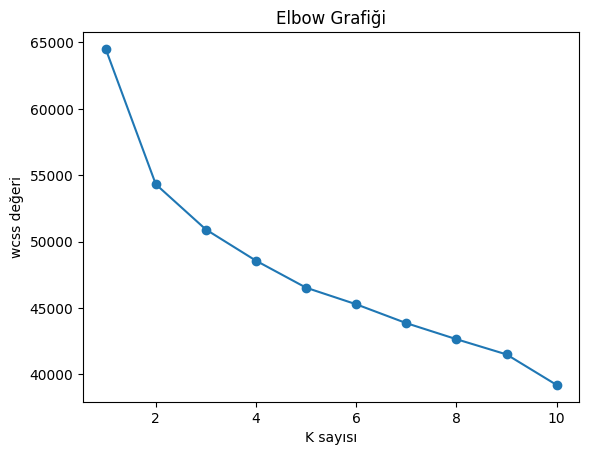

In [20]:
#elbow grafiği
plt.plot(range(1,11),wcss,marker="o")
plt.title("Elbow Grafiği")
plt.xlabel("K sayısı")
plt.ylabel("wcss değeri")
plt.show()

In [21]:
#grafikteki kırılma noktası 2 dir k=2 alarak işlem yaparız.
kmeans_result=KMeans(n_clusters=2,random_state=33,n_init=10)
kmeans_result.fit(X_scaled)
cluster_labels=kmeans_result.labels_ #oluşan labelları aldık 
cluster_center=kmeans_result.cluster_centers_ #kümenin merkezleri alındı 
data['Cluster']=cluster_labels #Cluster sütunu eklendi
data.head()


,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,Marital_Status_Alone,Marital_Status_Cycle,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,Day_Since_Registration,Cluster
0,1957,58138.0,0,0,58,635,88,546,172,88,...,0,0,0,0,1,0,0,0,4632,0
1,1954,46344.0,1,1,38,11,1,6,2,1,...,0,0,0,0,1,0,0,0,4082,1
2,1965,71613.0,0,0,26,426,49,127,111,21,...,0,0,0,0,0,1,0,0,4281,0
3,1984,26646.0,1,0,26,11,4,20,10,3,...,0,0,0,0,0,1,0,0,4108,1
4,1981,58293.0,1,0,94,173,43,118,46,27,...,0,0,0,1,0,0,0,0,4130,1


In [22]:
#silhouette_score metiriği
silhouette_avg=silhouette_score(X_scaled,cluster_labels)
print(f"Silhouette Score: {silhouette_avg}")


Silhouette Score: 0.19460969614451545


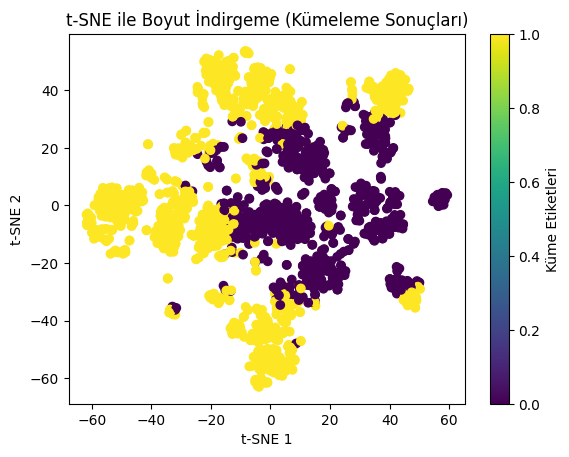

In [23]:
tsne = TSNE(n_components=2, random_state=42) #veriyi 2 boyuta indirdik
X_tsne = tsne.fit_transform(X_scaled)

# 2D scatter plot
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=cluster_labels, cmap='viridis')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.title('t-SNE ile Boyut İndirgeme (Kümeleme Sonuçları)')
plt.colorbar(label='Küme Etiketleri')
plt.show()